In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
X = data[data.columns[:-1]]
y = data['price_range'].copy()

In [6]:
print("Converting Multiclass to Binary Class dataset by reducing Class 1 to Class 0 and Class 2&3 to Class 1")
y[y==1] = 0
y[y==2] =1
y[y==3] =1

Converting Multiclass to Binary Class dataset by reducing Class 1 to Class 0 and Class 2&3 to Class 1


In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: price_range, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [10]:
print("Scaling the data to avoid overflow in sigmod function")
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train = standardscaler.transform(X_train)
X_test = standardscaler.transform(X_test)


Scaling the data to avoid overflow in sigmod function


In [11]:
print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)


Training data shape:  (1600, 20)
Testing data shape:  (400, 20)


In [12]:
m = np.array([0]*X_train.shape[1],dtype= float)
c= 0
alpha = .1
epoch = 1000*2
loss_data = []
n = len(y_train)
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig
def cost_func(y,z):
    cost0 = np.dot(y,np.log(sigmoid(z)))
    cost1 = np.dot((1-y),np.log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y)
    return cost

for i in range (epoch):
    z = np.dot(X_train,m) + c
    loss_data.append(cost_func(y_train.values,z))
    y_pred = sigmoid(z)
    m_dash = -1/n *np.sum(X_train*(y_train.values-y_pred).reshape(-1,1),axis=0)
    c_dash = -np.sum(y_train-y_pred)/n
    m -= alpha*m_dash
    c -= alpha*c_dash
print(f"Paramters: {m},\nBias: {c}")
            

  



Paramters: [ 1.58618873e+00  4.96537126e-02  1.01090415e-02 -1.15531748e-01
  3.61360875e-02 -5.88712231e-02  6.33261548e-02 -1.92447709e-01
 -1.63977070e-01  2.01426103e-01  4.68855336e-02  8.86992288e-01
  9.27993537e-01  6.27648098e+00 -8.27835534e-03  1.33161684e-01
  5.06240556e-03  8.55507823e-02 -1.27446309e-01 -1.09514977e-01],
Bias: -0.0005105178730447321


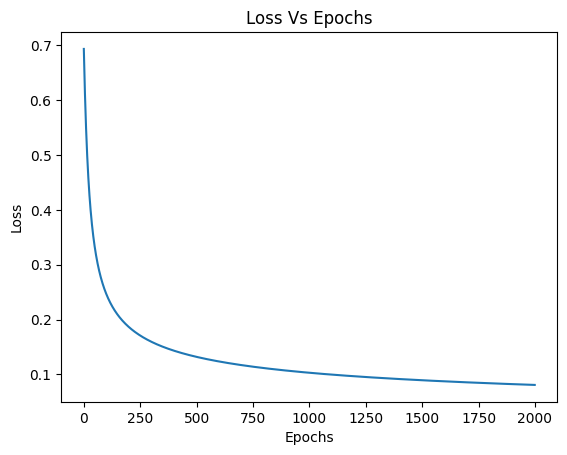

In [13]:
plt.plot(loss_data)
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Loss Vs Epochs")
plt.show()

In [14]:
def predict(X):
    z = np.dot(X,m) + c
    lis = []
    i_list = []
    z_list = []
    for i in sigmoid(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
        i_list.append(i)
        z_list.append(z)
    return lis,i_list,z_list
def accuracy(y_test,y_pred):
    return np.sum(np.array(y_pred) == y_test)/len(y_test)


In [15]:
y_pred_test,i_list,z_list = predict(X_test)
acc = accuracy(y_test,y_pred_test)
print(f"accuracy of the model on test set after optimizing is {acc*100}%")

accuracy of the model on test set after optimizing is 99.0%


In [16]:
# plt.scatter(z_list[0],i_list)
# plt.plot(z_list[0],[0.5]*len(i_list),'r')